In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, time
import numpy as np
import scipy.stats
import jinja2
import re
import math

In [2]:
plt.rc('legend', **{'fontsize': 10})
plt.rc('axes', **{'labelsize': 10, 'titlesize': 10})
plt.rc('xtick', **{'labelsize': 10})
plt.rc('ytick', **{'labelsize': 10})

In [3]:
def compare_run(exp_name, constraint, start = 0):
    """
    Plot the loss over iteration for each run
    Return a DataFrame that includes the iteration with the lowest loss in each run
    """
    results = [mfile for mfile in glob.glob('../Output/*.csv') if exp_name in mfile]

    name = [s.split('_')[-3]+'_'+s.split('_')[-2] for s in results]
    
    lowest_loss = pd.DataFrame()
    nrow = math.ceil(len(results)/2)
    fig, axes = plt.subplots(nrow, 2, figsize = (14, nrow * 4))
    for i in range(len(results)):
        
        df = pd.read_csv(results[i])
        lowest_loss = pd.concat([lowest_loss, df[df.loss == df.loss.min()]], axis = 0)
        
        # plot the trend for the variable
        df.loc[start:, 'loss'].plot(ax = axes.flat[i], xlim = [start, 800], title = '{}: Final loss: {:.0f}'.format(name[i], df.loss.min()))
       
    plt.show()

    # compute the value for constraint parameters
    # lowest_loss['HDP'] = 1/(1+np.exp(lowest_loss['HDP']))
    for i in constraint:
        if i == 'w0':
            lowest_loss['w0'] = np.exp(lowest_loss['w0'])
        else:
            lowest_loss['b'+str(i)] = -np.exp(lowest_loss['b'+str(i)]) 
            
    lowest_loss = lowest_loss.loc[:, 'HDP':'loss']
    lowest_loss.insert(0, 'name', name)
   
    return lowest_loss


In [4]:
def plot_result(exp_name, constraint, start = 0, end = 800):
    """
    Plot the gradients and estimates for each parameters over epochs
    """
    file_name = [mfile for mfile in glob.glob('../Output/*.csv') if exp_name in mfile]
    result = pd.read_csv(file_name[0])

    n_params = int((len(result.columns) - 1) / 2) 

    # convert back the value of constraint parameters
    # result['HDP'] = 1/(1+np.exp(result['HDP']))
    for i in constraint:
        if i == 'w0':
            result['w0'] = np.exp(result['w0'])
        else:
            result['b'+str(i)] = -np.exp(result['b'+str(i)])
    
    fig, ax = plt.subplots(n_params + 1, 2, figsize = (14, 5 * (n_params+1)))

    for i in range(n_params):

        dparam = result.columns[i]
        param = result.columns[i+n_params]
        result[[dparam]].plot(ax = ax[i,0], xlabel = '', xlim = [start, end], title = 'Final {}: {:.4f}'.format(dparam, result[dparam].iloc[-1]))
        result[[param]].plot(ax = ax[i,1], xlabel = '', xlim = [start, end], title = 'Final {}: {:.4f}'.format(param, result[param].iloc[-1]))

    ax[n_params, 0].axis('off')
    ax[n_params, 1].axis('off')
    chart = fig.add_subplot(n_params + 1, 1, n_params + 1)
    result['loss'].plot(ax = chart, xlabel = 'iteration', ylabel = 'Loss', title = 'Final loss: {:.0f}'.format(result['loss'].iloc[-1]))
        
    plt.show()

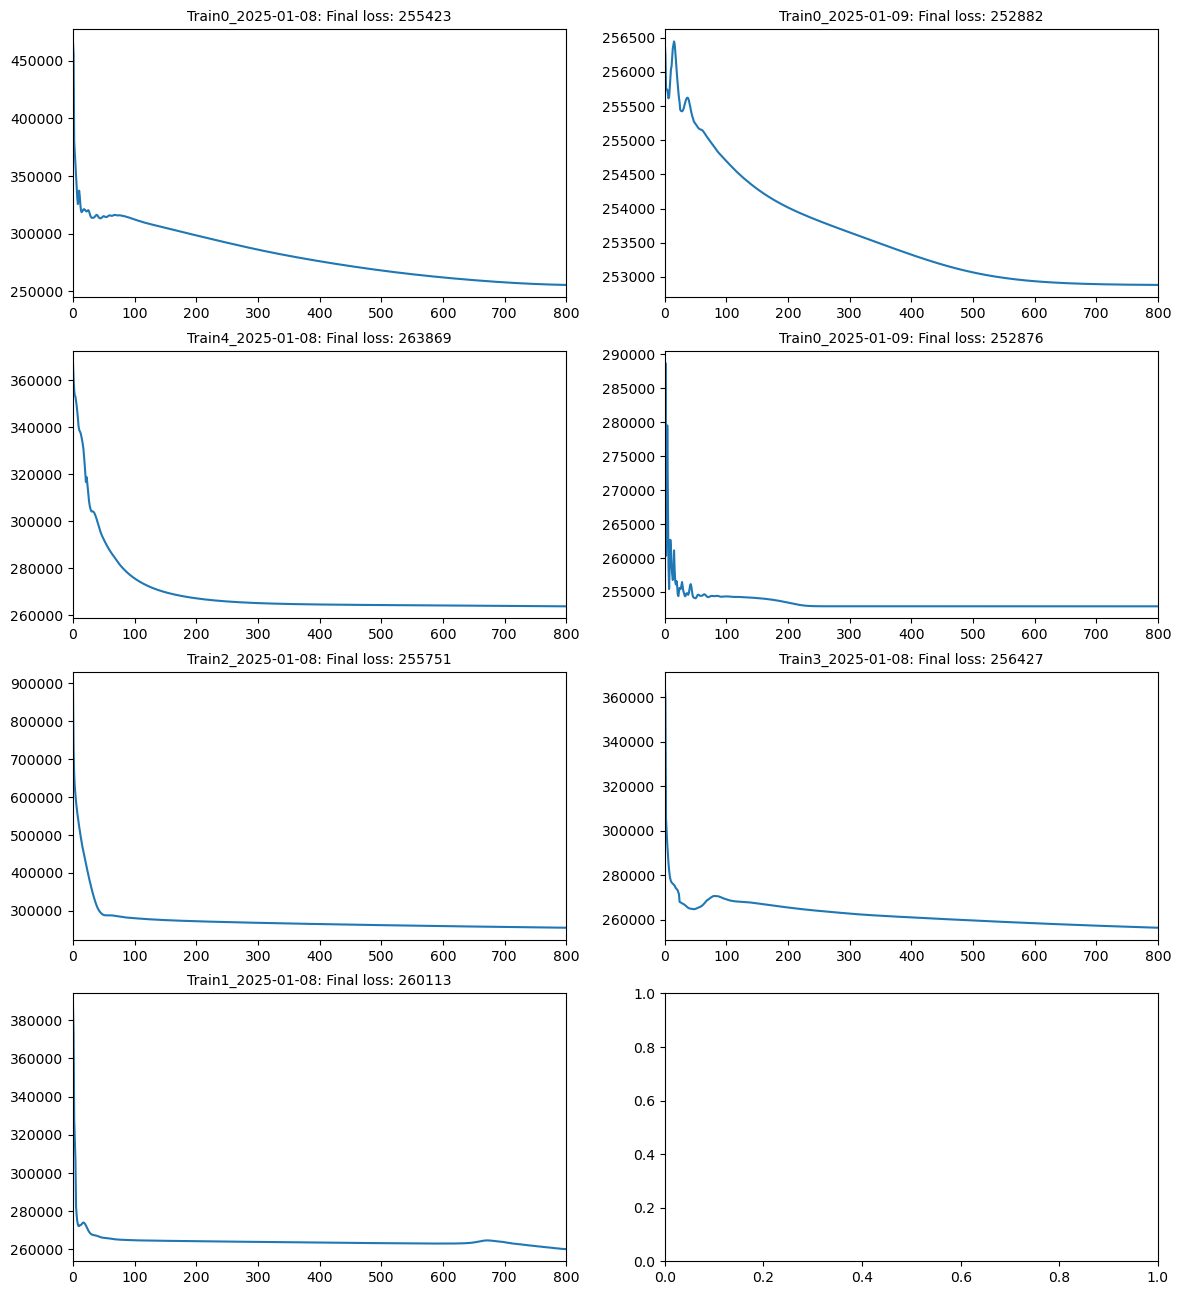

,name,HDP,HGP,hs,wh,w0,b0,b1,b2,b3,b4,b5,b6,b7,loss
799,Train0_2025-01-08,0.066,0.236,3.827,74.125,6.035,-0.207,-0.005,0.054,-0.559,-0.196,-0.137,-0.191,-0.676,"255,422.535"
799,Train0_2025-01-09,0.069,0.260,8.046,-0.653,0.000,0.829,-0.003,-0.086,-0.291,-0.002,0.225,-0.304,-1.449,"252,882.279"
799,Train4_2025-01-08,0.352,0.486,7.585,12.535,5.093,0.511,-0.005,-0.021,-0.280,-0.099,-0.029,-0.583,-0.835,"263,869.354"
799,Train0_2025-01-09,0.069,0.261,8.169,-0.720,0.000,0.836,-0.003,-0.087,-0.287,-0.000,0.225,-0.304,-1.442,"252,875.569"
799,Train2_2025-01-08,0.089,0.200,3.947,40.594,4.193,0.056,-0.005,0.028,-0.551,-0.204,-0.103,-0.194,-0.747,"255,751.489"
799,Train3_2025-01-08,0.081,0.175,6.984,4.151,1.287,0.488,-0.004,-0.042,-0.380,-0.041,0.154,-0.194,-1.106,"256,426.542"
799,Train1_2025-01-08,0.086,0.178,6.129,8.184,2.389,0.308,-0.005,-0.007,-0.465,-0.164,0.001,-0.263,-0.894,"260,112.801"


In [47]:
compare_run('relax_all_diff_dist', [3,4])

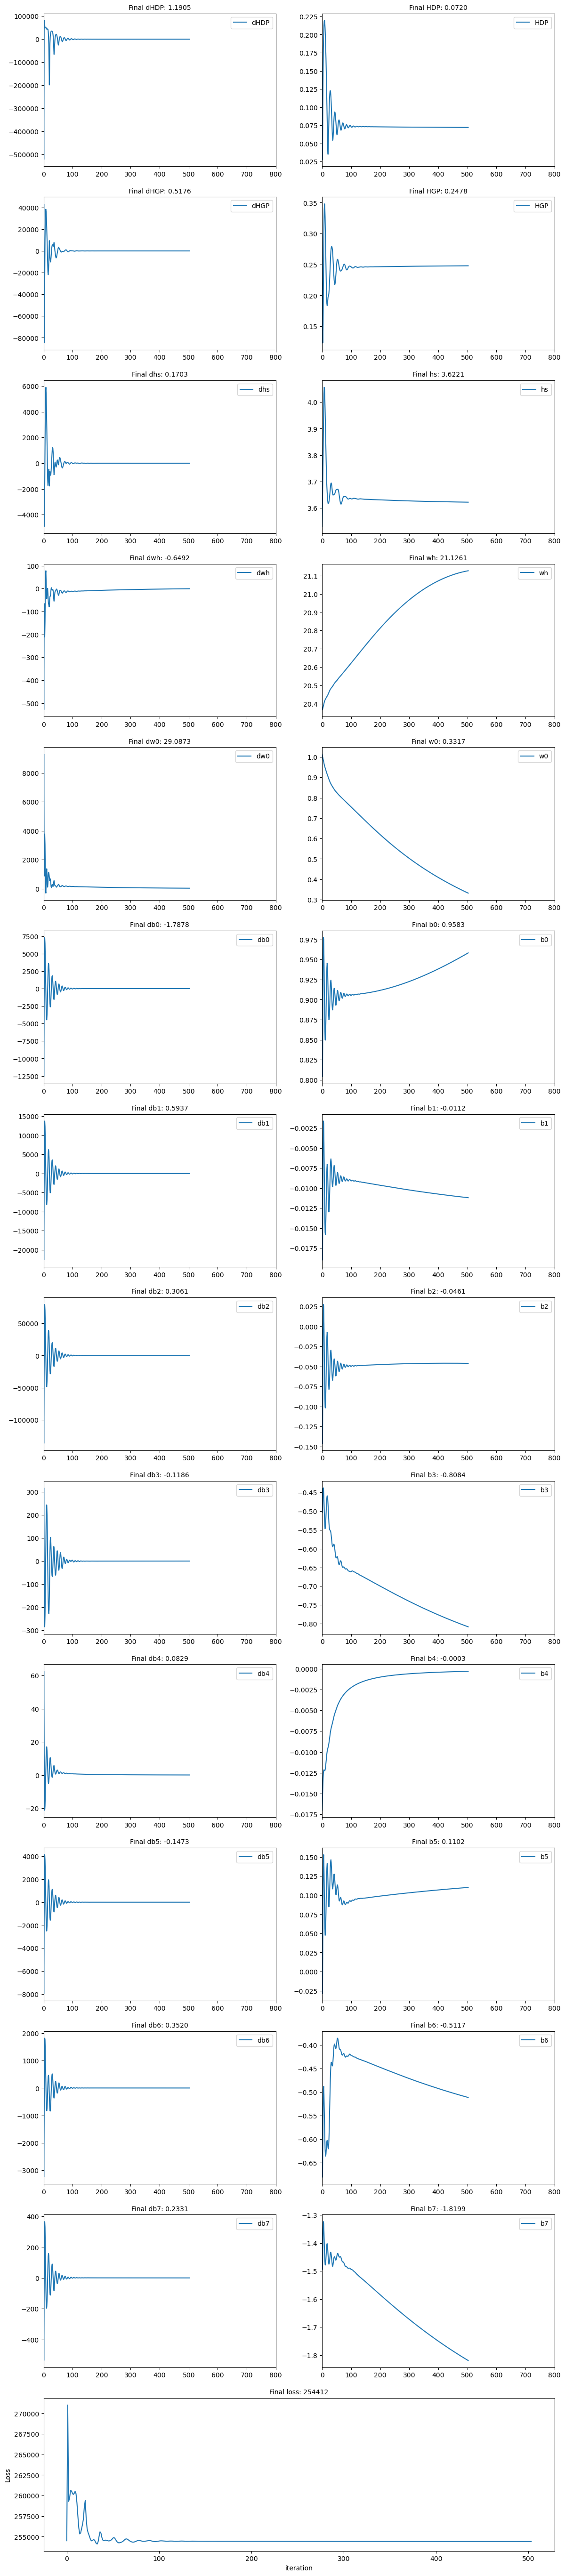

In [48]:
plot_result('prev_optim_start_point_diff_dist_Train0', [3,4], start = 0, end = 800) 

In [7]:
# plot_result('reproduce_constr_123467_w0_Train0', [1,2,3,4,6,7,'w0'], start = 0) 

In [36]:
# compare_run('diff_impute_constr_income_w0', [2, 3, 4])

In [8]:
# plot_result('reproduce_constr_123467_w0_Train0', [1,2,3,4,6,7,'w0'])

In [ ]:
result = pd.DataFrame(np.array([[0.1, -260081],
                                [0.2, -255074],
                                [0.3, -254425],
                                [0.4, -255532],
                                [0.5, -256135]])).rename(columns = {0: 'HGP', 1: 'LL'})
result.set_index('HGP', inplace = True)


In [46]:
for hgp, ll in result.iterrows():
    print(hgp)
    print(ll.values)

0.1
[-260081.]
0.2
[-255074.]
0.3
[-254425.]
0.4
[-255532.]
0.5
[-256135.]


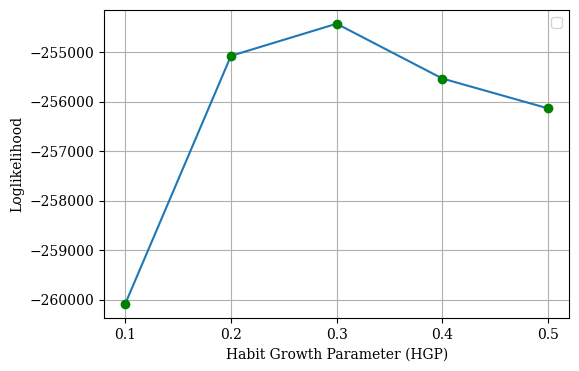

In [48]:

ax = result.plot(figsize = (6, 4))
ax.set_xticks(result.index, result.index)
ax.legend('')
ax.set_ylabel('Loglikelihood')
ax.set_xlabel('Habit Growth Parameter (HGP)')
ax.grid()
for hgp, ll in result.iterrows():
    ax.plot(hgp, ll.values[0], 'og')

plt.rcParams.update({'font.size': 10})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

### Different starting points

In [4]:
# results = [mfile for mfile in glob.glob('../Output/*.csv') if get_result_time(mfile, 70) and '032954' not in mfile and '171819' not in mfile]
# print(len(results))
# df = pd.DataFrame()
# for f in results:
#     row = pd.read_csv(f, usecols = lambda x: x not in ['Unnamed: 0', 'dB', 'B']).iloc[-1]
#     df = pd.concat([df, row], axis = 1)

In [7]:
# df2

#### Bootstrap result

In [10]:
def bootstrap_result(files, constraint, epsilon):
    """
    
    """
    df = pd.DataFrame({})
    for file in files:   
        
        rec = pd.read_csv(file, usecols = lambda x: x not in ['Unnamed: 0', 'dB', 'B'],  dtype = np.float64)
        rec = rec.iloc[-1]
        df = pd.concat([df, rec], axis = 1)
    df = df.T
   
    for i in constraint:
        df['b'+str(i)] = -np.exp(df['b'+str(i)])
        
    df = df.loc[df.apply(lambda row: (abs(row.loc[('d' in idx for idx in row.index)]) < epsilon).all(), axis = 1)] # filter converged results
    df = df[df.w0 >= 0]
    
    return df

def bootstrap_summary(files, constraint, epsilon, full_sample_test, var_name):
    
    result_df = bootstrap_result(files, constraint, epsilon)
  
    param_summary = result_df[[col for col in result_df.columns if not 'd' in col]].describe().T
    param_summary['est'] = pd.Series(full_sample_test)
    param_summary['z-value'] = [np.NaN if param_summary['std'][param] < 1e-6 else param_summary['est'][param] / param_summary['std'][param] for param in param_summary.index] 
    param_summary['Pr(>|z|)'] = scipy.stats.norm.sf(abs(param_summary['z-value'])) * 2
    param_summary.rename(index = var_name, inplace = True)
    
    return result_df, param_summary[['est', 'std', 'z-value', 'Pr(>|z|)', 'count', 'min', 'max', 'mean']]

In [11]:
# 0.083404 	0.278888 	3.682959 	20.490208 	0.860153 	0.902616 	-0.008324 	-0.051583 	-0.580761 	-0.006841 	0.125830 	-0.440056 	-1.463603 	254110.434450

results = [mfile for mfile in glob.glob('../Output/Bootstrap/*.csv') if 'prev_optim' in mfile]
full_sample_test = {'HDP': 0.083, 'HGP': 0.28, 'hs': 3.68, 'wh': 20.49, 'w0': 0.86, 
                    'b0': 0.90, 'b1': -0.0083, 'b2': -0.052, 'b3': -0.58, 'b4': -0.0068, 'b5': 0.126, 'b6': -0.44, 'b7': -1.46, 'loss': -254110}
var_name = dict(zip(['b'+str(i) for i in range(9)], ['ASC', 'dfrw', 'log(income)', 'SIP', 'pre-vax', 'during_post', 'is_weekend', 'is_holiday']))

pd.options.display.float_format = '{:,.3f}'.format
result_df, param_summary = bootstrap_summary(results, [3, 4], 200, full_sample_test, var_name)
param_summary

,est,std,z-value,Pr(>|z|),count,min,max,mean
HDP,0.083,NaN,NaN,NaN,1.000,0.074,0.074,0.074
HGP,0.280,NaN,NaN,NaN,1.000,0.247,0.247,0.247
hs,3.680,NaN,NaN,NaN,1.000,3.653,3.653,3.653
wh,20.490,NaN,NaN,NaN,1.000,17.904,17.904,17.904
w0,0.860,NaN,NaN,NaN,1.000,0.001,0.001,0.001
ASC,0.900,NaN,NaN,NaN,1.000,0.875,0.875,0.875
dfrw,-0.008,NaN,NaN,NaN,1.000,-0.018,-0.018,-0.018
log(income),-0.052,NaN,NaN,NaN,1.000,-0.011,-0.011,-0.011
SIP,-0.580,NaN,NaN,NaN,1.000,-0.929,-0.929,-0.929
pre-vax,-0.007,NaN,NaN,NaN,1.000,-0.000,-0.000,-0.000


In [118]:
result_df

,dHDP,dHGP,dhs,dwh,dw0,db0,db1,db2,db3,db4,...,w0,b0,b1,b2,b3,b4,b5,b6,b7,loss
259,-0.135,1.000,-0.105,2.606,-0.960,1.572,-0.535,-0.071,0.095,0.065,...,-0.012,0.885,-0.014,-0.037,-0.928,-0.000,0.133,-0.657,-1.866,"254,124.227"
189,0.902,2.085,0.231,4.458,0.097,3.996,-0.526,-4.165,0.098,0.103,...,0.001,0.875,-0.018,-0.011,-0.929,-0.000,0.139,-0.884,-2.592,"253,714.536"
499,120.399,2.643,-0.075,0.093,8.879,-0.124,0.276,-1.295,-0.203,0.001,...,-8.471,0.918,-0.070,-0.070,-2.328,-0.005,0.257,-3.067,-4.974,"254,532.660"
209,7.196,-0.168,0.041,2.601,-0.778,-2.962,-0.505,4.503,0.133,0.089,...,-0.011,0.996,-0.010,-0.036,-1.226,-0.000,0.061,-0.617,-2.250,"249,956.673"
419,7.592,2.575,0.287,0.444,-0.000,7.883,0.006,-7.747,0.017,0.030,...,-0.000,0.143,-0.006,0.017,-0.548,-0.000,0.231,-0.559,-2.089,"258,030.292"
219,0.310,1.297,-0.301,2.257,-0.624,-2.050,-0.529,3.619,0.099,0.066,...,-0.008,0.977,-0.016,-0.041,-1.101,-0.000,0.183,-0.625,-2.232,"258,389.622"
229,-2.375,1.103,-0.007,2.288,-0.277,-5.278,-0.439,6.164,0.037,0.061,...,-0.004,1.049,-0.014,-0.055,-0.849,-0.000,0.158,-0.468,-2.227,"255,283.337"
249,0.458,0.672,-0.042,1.502,-0.737,0.924,-0.266,-0.008,0.082,0.066,...,-0.010,0.894,-0.013,-0.044,-0.874,-0.000,0.181,-0.485,-2.162,"253,986.578"
279,-0.402,1.159,-0.050,2.125,-0.471,3.605,-0.439,-2.216,0.104,0.060,...,-0.005,0.832,-0.016,-0.028,-0.955,-0.000,0.122,-0.594,-2.177,"253,389.102"
219,-4.937,0.979,-0.140,3.494,-2.638,-9.670,-1.375,13.458,0.261,0.094,...,-0.040,1.117,-0.012,-0.044,-1.092,-0.000,0.024,-0.623,-2.136,"254,912.075"


In [8]:
# results = [mfile for mfile in glob.glob('../Output/Bootstrap/*.csv') if 'fixHabit_5' in mfile]
# full_sample_test = {'HDP': 0.128, 'HGP': 0.3, 'hs': 3.531, 'wh': 20.378, 'w0': 1.014, 
#                     'b0': 0.904, 'b1': -0.009, 'b2': -0.046, 'b3': -0.455, 'b4': -0.017, 'b5': 0.071, 'b6': -0.581, 'b7': -1.394, 'loss': -254425}
# var_name = dict(zip(['b'+str(i) for i in range(9)], ['ASC', 'dfrw', 'log(income)', 'SIP', 'pre-vax', 'during_post', 'is_weekend', 'is_holiday']))

# pd.options.display.float_format = '{:,.3f}'.format
# bootstrap_summary(results, [3, 4], full_sample_test, var_name)

In [9]:
# results = [mfile for mfile in glob.glob('../Output/Bootstrap/*.csv') if 'fixHabit_T' in mfile]
# full_sample_test = {'HDP': 0.128, 'HGP': 0.3, 'hs': 3.531, 'wh': 20.378, 'w0': 1.014, 
#                     'b0': 0.904, 'b1': -0.009, 'b2': -0.046, 'b3': -0.455, 'b4': -0.017, 'b5': 0.071, 'b6': -0.581, 'b7': -1.394, 'loss': -254425}
# var_name = dict(zip(['b'+str(i) for i in range(9)], ['ASC', 'dfrw', 'log(income)', 'SIP', 'pre-vax', 'during_post', 'is_weekend', 'is_holiday']))

# pd.options.display.float_format = '{:,.4f}'.format
# bootstrap_summary(results, [3, 4], full_sample_test, var_name)

In [60]:
# full_sample_test = {'HDP': 0.11, 'HGP': 0.2, 'hs': 3.7, 'wh': 63.6, 'w0': 5.2, 
#                     'b0': 1.49, 'b1': -0.005, 'b2': -0.11, 'b3': -0.45, 'b4': -0.11, 'b5': -0.04, 'b6': -0.23, 'b7': -0.73, 'loss': -255074}
# var_name = dict(zip(['b'+str(i) for i in range(9)], ['ASC', 'dfrw', 'log(income)', 'SIP', 'pre-vax', 'during_post', 'is_weekend', 'is_holiday']))

# pd.options.display.float_format = '{:,.3f}'.format
# bootstrap_summary(results, [3, 4], full_sample_test, var_name)

In [8]:
results = [mfile for mfile in glob.glob('../Output/Bootstrap/*.csv') if 'pts' in mfile]

In [61]:
full_sample_test = {'HDP': 0.11, 'HGP': 0.2, 'hs': 3.7, 'wh': 63.6, 'w0': 5.2, 
                    'b0': 1.49, 'b1': -0.005, 'b2': -0.11, 'b3': -0.45, 'b4': -0.11, 'b5': -0.04, 'b6': -0.23, 'b7': -0.73, 'loss': 255074}
var_name = dict(zip(['b'+str(i) for i in range(9)], ['ASC', 'dfrw', 'log(income)', 'SIP', 'pre-vax', 'during_post', 'is_weekend', 'is_holiday']))

pd.options.display.float_format = '{:,.4f}'.format
df = bootstrap_summary(results, [3, 4], full_sample_test, var_name)
df.loc['HGP', 'z-value'] = '-'
df

,est,std,z-value,Pr(>|z|),count,min,max,mean
HDP,0.1100,0.1939,0.5672,0.5706,129.0000,0.0620,0.6401,0.3160
HGP,0.2000,0.0000,-,0.0000,129.0000,0.2000,0.2000,0.2000
hs,3.7000,1.4250,2.5965,0.0094,129.0000,3.5595,8.1861,5.1580
wh,63.6000,8.7254,7.2891,0.0000,129.0000,43.8835,72.7207,59.2580
w0,5.2000,3.0585,1.7002,0.0891,129.0000,0.7249,10.7269,5.3985
ASC,1.4900,0.4375,3.4059,0.0007,129.0000,-0.2744,1.8325,0.3401
dfrw,-0.0050,0.0025,-2.0125,0.0442,129.0000,-0.0162,-0.0006,-0.0076
log(income),-0.1100,0.0447,-2.4585,0.0140,129.0000,-0.1419,0.0723,0.0086
SIP,-0.4500,0.1411,-3.1892,0.0014,129.0000,-1.0188,-0.1431,-0.4621
pre-vax,-0.1100,0.0880,-1.2507,0.2110,129.0000,-0.3915,-0.0178,-0.1698


In [185]:
results = [mfile for mfile in glob.glob('../Output/Bootstrap/*.csv') if 'date' in mfile]

In [186]:
full_sample_test = {'HDP': 0.084, 'HGP': 0.2, 'hs': 3.6, 'wh': 62.5, 'w0': 3.0, 
                    'b0': 0.56, 'b1': -0.0065, 'b2': -0.031, 'b3': -0.45, 'b4': -0.018, 'b5': -0.067, 'b6': -0.21, 'b7': -0.81, 'loss': 254978}
var_name = dict(zip(['b'+str(i) for i in range(9)], ['ASC', 'dfrw', 'log(income)', 'SIP', 'pre-vax', 'during_post', 'is_weekend', 'is_holiday']))

pd.options.display.float_format = '{:,.3f}'.format
df = bootstrap_summary(results, [3, 4], full_sample_test, var_name)
df.loc['HGP', 'z-value'] = '-'
df

,est,std,z-value,Pr(>|z|),count,min,max,mean
HDP,0.084,0.165,0.509,0.611,49.000,0.077,0.575,0.261
HGP,0.200,0.000,-,0.000,49.000,0.200,0.200,0.200
hs,3.600,1.561,2.307,0.021,49.000,3.645,8.152,5.021
wh,62.500,21.777,2.870,0.004,49.000,17.875,86.863,62.131
w0,3.000,2.869,1.045,0.296,49.000,1.938,10.038,6.062
ASC,0.560,0.460,1.217,0.223,49.000,-0.292,1.635,0.361
dfrw,-0.006,0.002,-2.880,0.004,49.000,-0.014,-0.002,-0.006
log(income),-0.031,0.046,-0.680,0.497,49.000,-0.127,0.062,0.002
SIP,-0.450,0.102,-4.422,0.000,49.000,-0.641,-0.235,-0.421
pre-vax,-0.018,0.073,-0.247,0.805,49.000,-0.298,-0.040,-0.171


In [59]:
results = [file for file in glob.glob('../Output/*.csv') if get_result_time(file, 168, 360)]

In [60]:
results = [file for file in results if (pd.read_csv(file)['loss'].iloc[-1] < 500) & (int(pd.read_csv(file)['loss'].iloc[-1]) != 449)]

In [74]:
full_sample_est = [0.136, 0.43, -0.008, -0.02, -0.19, -0.038, 3.9, 52.3, 2.4, 448.54]
bootstrap_summary(results, full_sample_est)

,count,min,max,mean,est,std,z-value,Pr(>|z|)
HDP,123.0,0.136203,0.150000,0.149888,0.136,0.001244,109.318331,0.000000e+00
b0,123.0,0.084381,0.547375,0.330205,0.430,0.114320,3.761361,1.689912e-04
b1,123.0,-0.008396,-0.005118,-0.006617,-0.008,0.000944,-8.473810,2.374955e-17
b2,123.0,-0.027792,0.007836,-0.012628,-0.020,0.010265,-1.948289,5.138044e-02
b3,123.0,-0.191362,-0.098755,-0.121607,-0.190,0.020188,-9.411557,4.888400e-21
b4,123.0,-0.039173,0.001185,-0.014295,-0.038,0.014908,-2.548906,1.080613e-02
hs,123.0,3.916445,4.025057,3.994791,3.900,0.028049,139.040986,0.000000e+00
wh,123.0,41.302260,71.655417,62.279618,52.300,7.602798,6.879046,6.025470e-12
w0,123.0,1.691616,4.093209,2.942978,2.400,0.576087,4.166036,3.099416e-05
loss,123.0,442.495439,452.510950,447.436902,448.540,3.711292,120.858182,0.000000e+00


In [78]:
def explore_result(file_name):
    
    result = pd.read_csv(file_name, usecols = lambda x: 'Unnamed' not in x)
    db1, db0, dwh, HGP, b1, b0, wh, w0, loss = result.iloc[-1]
    db1_, db0_, dwh_, HGP_, b1_, b0_, wh_, w0_, loss_ = result.iloc[0]
    
    plt.rc('legend', **{'fontsize': 20})
    plt.rc('axes', **{'labelsize': 20, 'titlesize': 20})
    plt.rc('xtick', **{'labelsize': 20})
    plt.rc('ytick', **{'labelsize': 20})

    fig, ax = plt.subplots(3,3, figsize = (30, 25))

    result[['db0']].plot(ax = ax[0,0], xlabel = 'iteration', title = 'Final db0: {}'.format(round(db1, 4)))
    result[['db1']].plot(ax = ax[0,1], xlabel = 'iteration', title = 'Final db1: {}'.format(round(db0, 4)))
    result[['dwh']].plot(ax = ax[0,2], xlabel = 'iteration', title = 'Final dwh: {}'.format(round(dwh, 4)))
    result[['b0']].plot(ax = ax[1,0], xlabel = 'iteration', title = 'Initial b0: {}, Final b0: {}'.format(round(b0_, 2), round(b0, 4)))
    result[['b1']].plot(ax = ax[1,1], xlabel = 'iteration', title = 'Initial b1: {}, Final b1: {}'.format(round(b1_, 4), round(b1, 4)))
    result[['wh']].plot(ax = ax[1,2], xlabel = 'iteration', title = 'Initial wh: {}, Final wh: {}'.format(round(wh_, 2), round(wh, 4)))

    ax[2,0].axis('off')
    ax[2,1].axis('off')
    ax[2,2].axis('off')
    chart = fig.add_subplot(313)
    result['loss'].plot(ax = chart, xlabel = 'iteration', ylabel = 'Loss', title = 'Final loss: {}'.format(round(loss, 4)))
    
    plt.show()

#### Sample size N = 573, epoch = 800

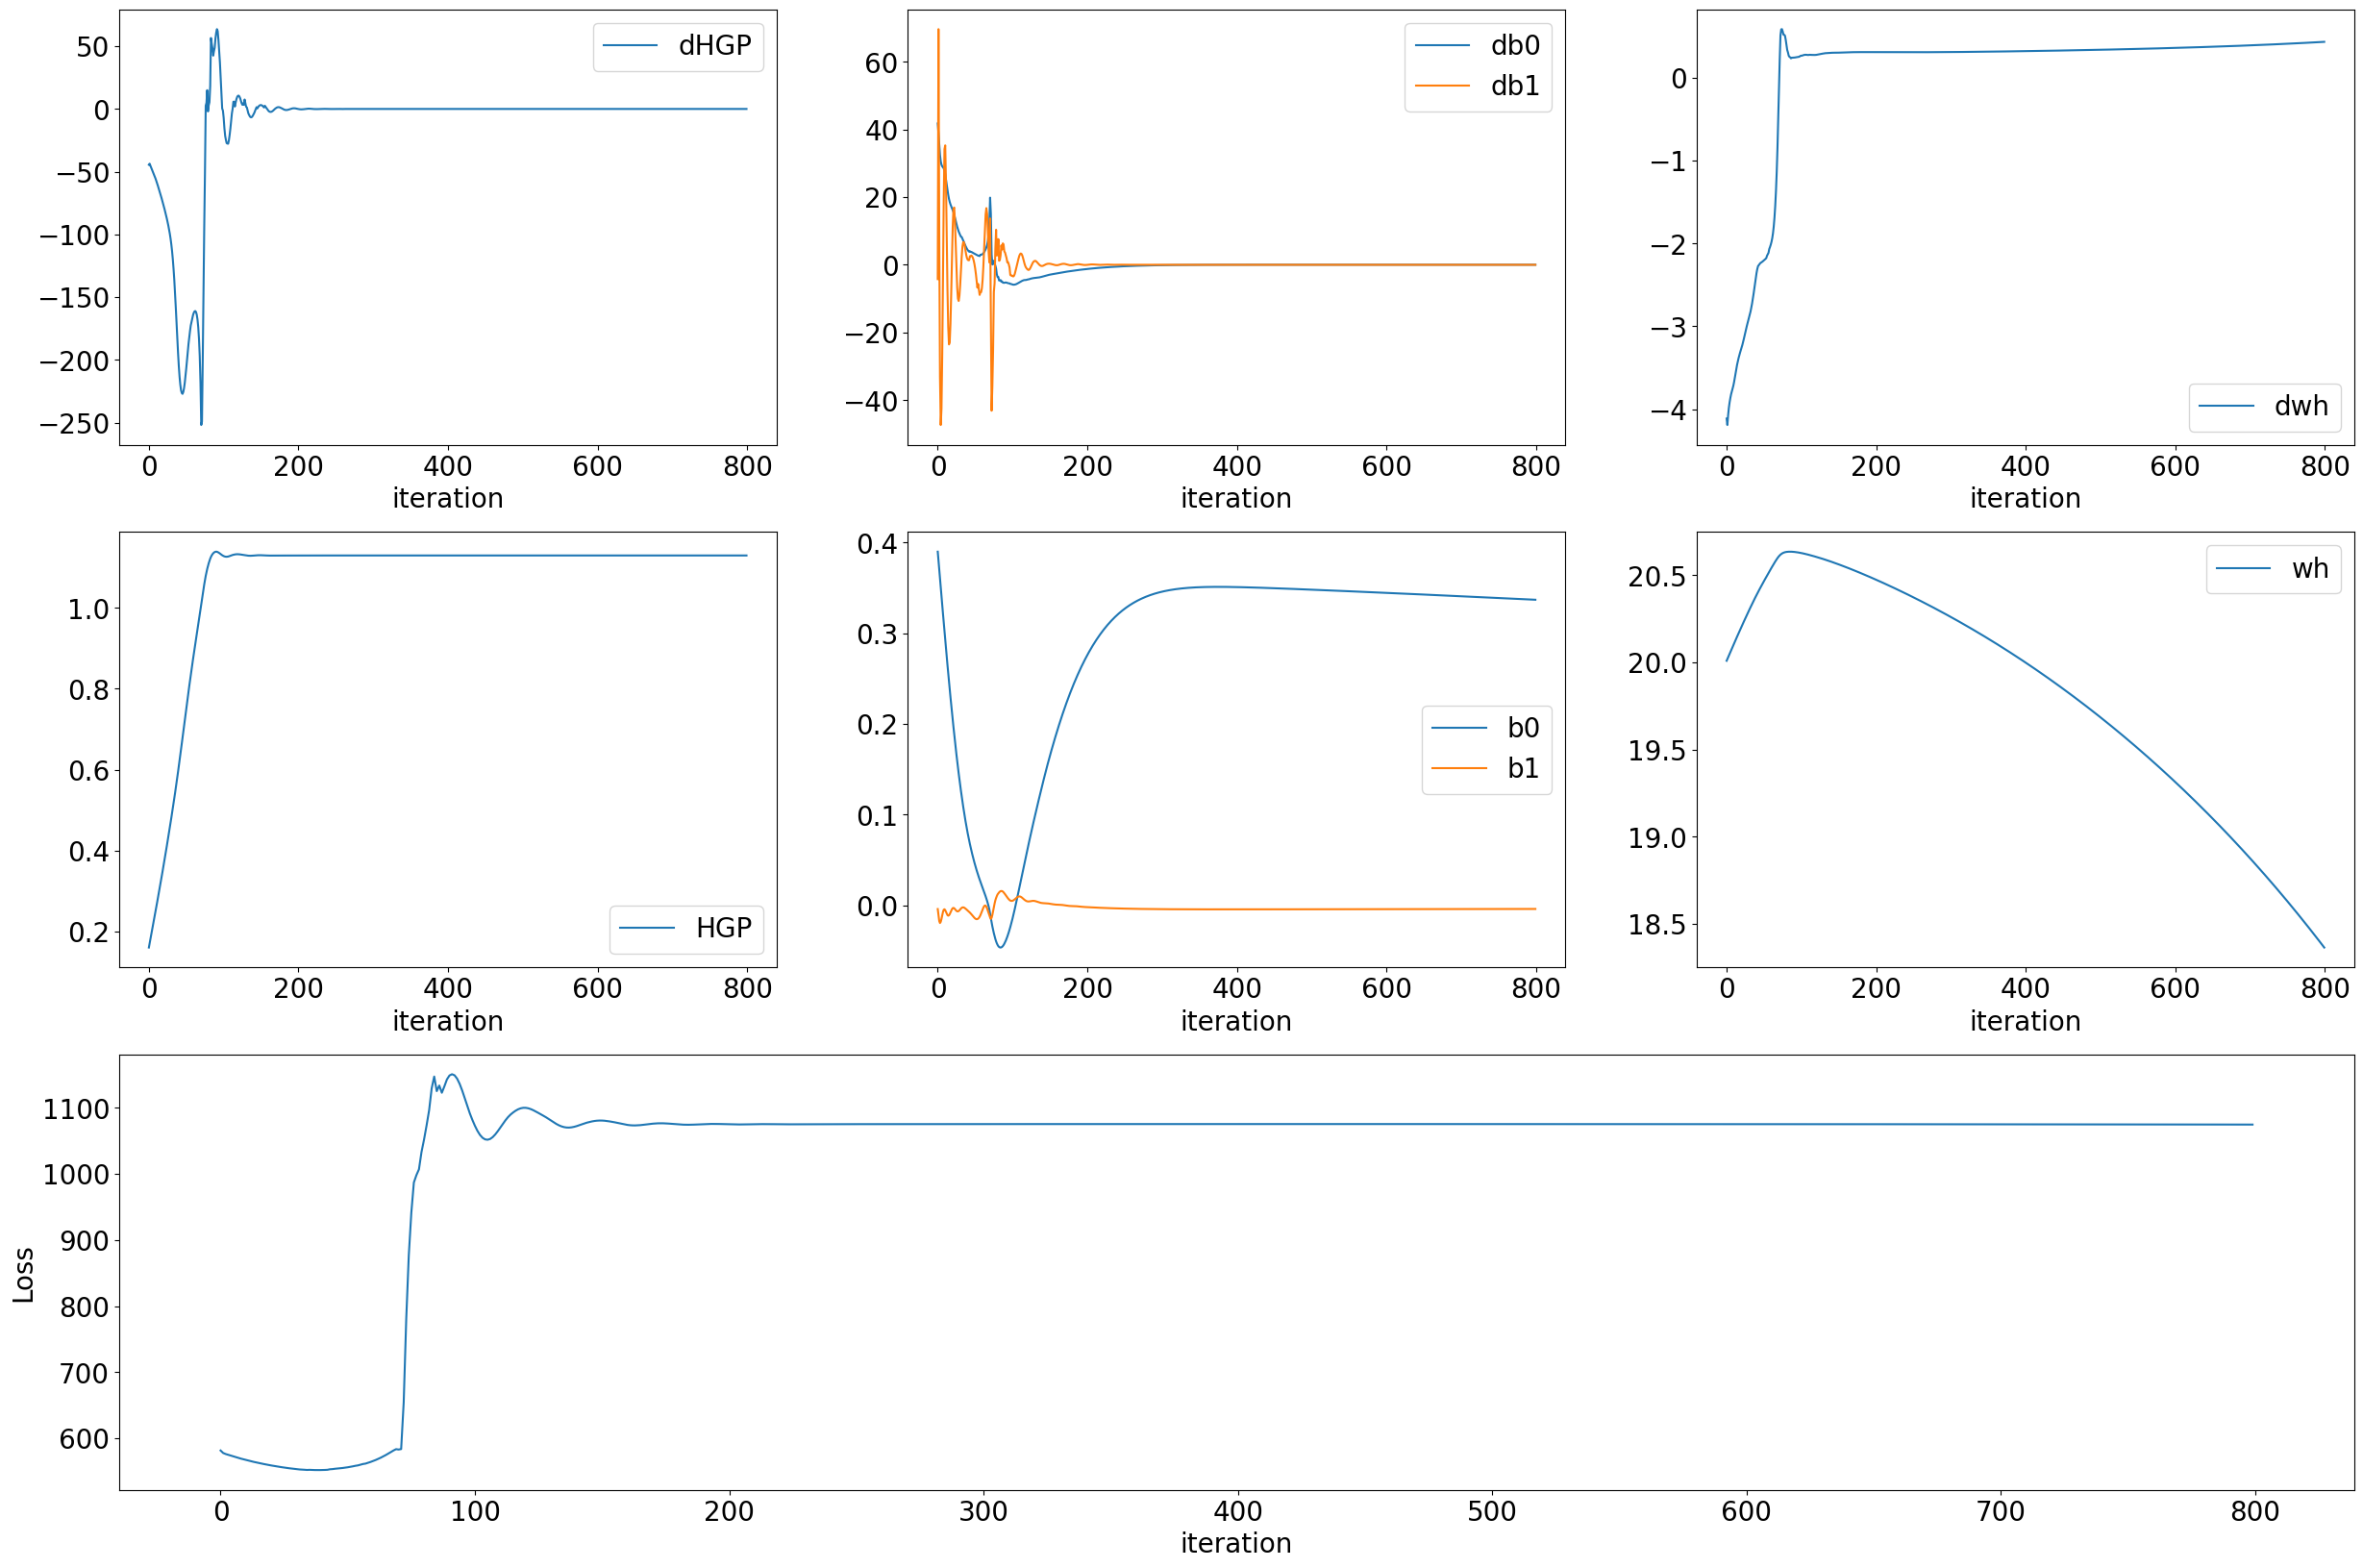

In [11]:
explore_result('676462')

#### Estimation
HDP = HGP, HGP = 0.5 \
w0 = 5

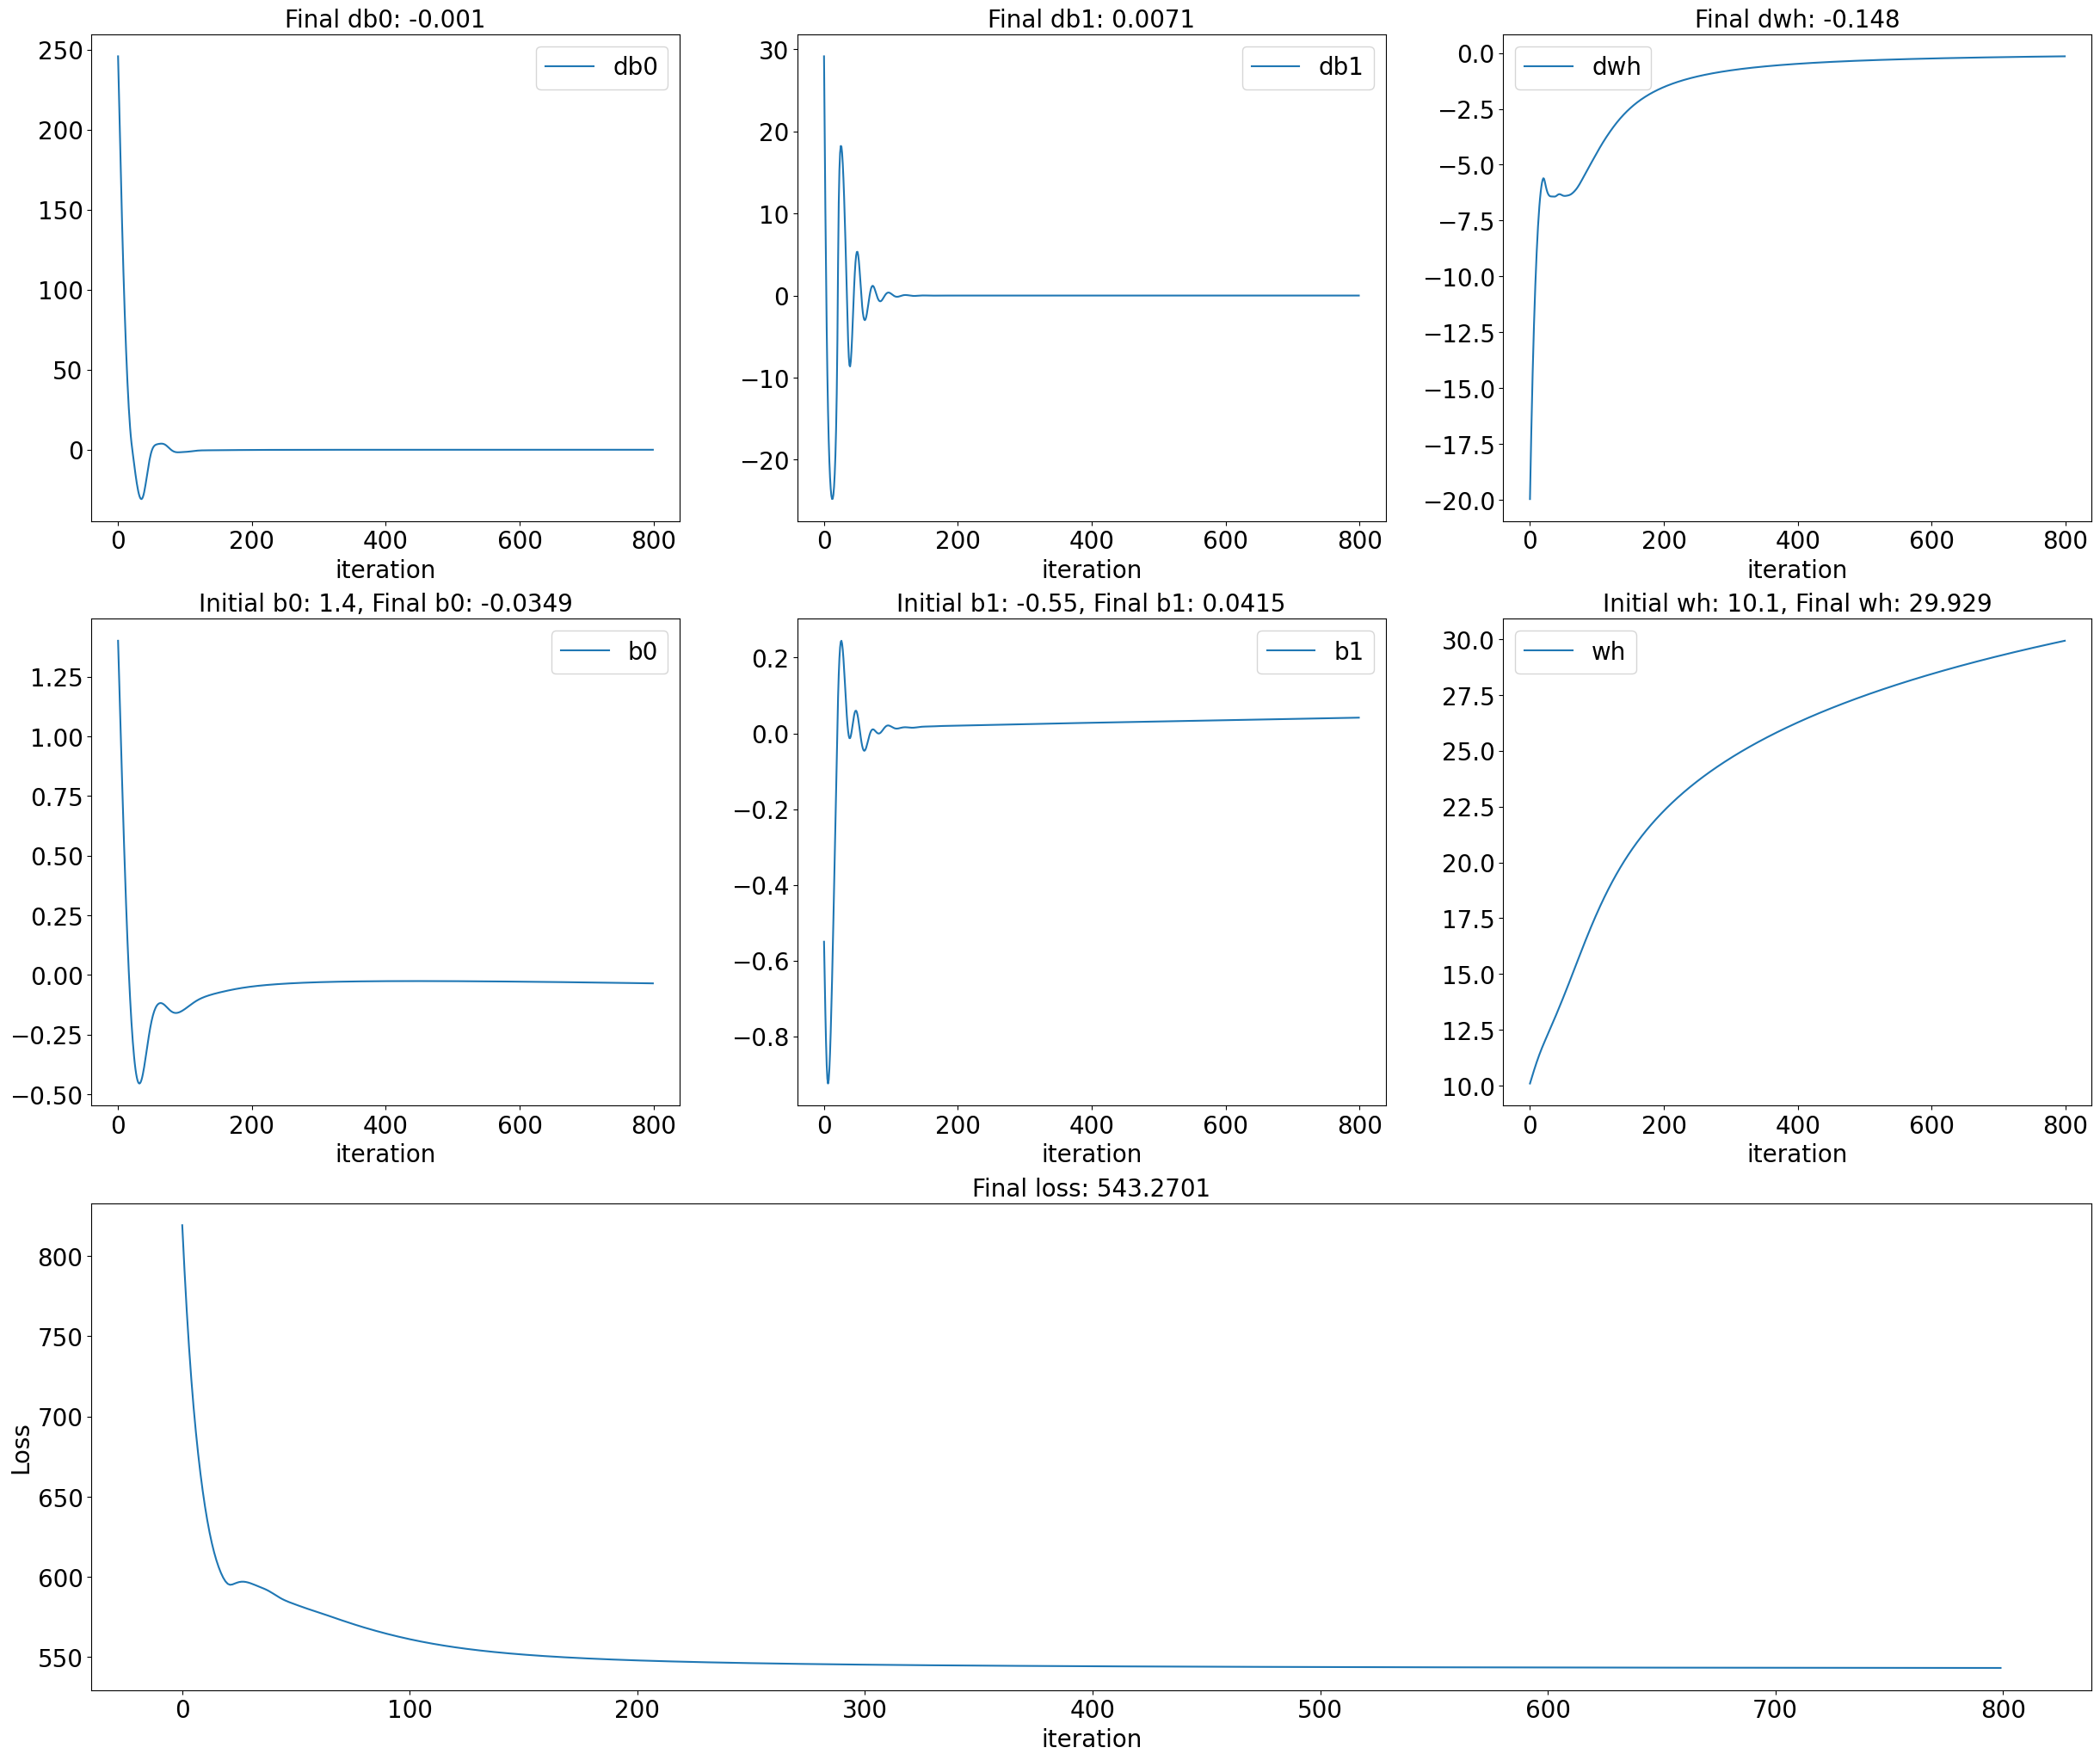

In [79]:
explore_result('115603')

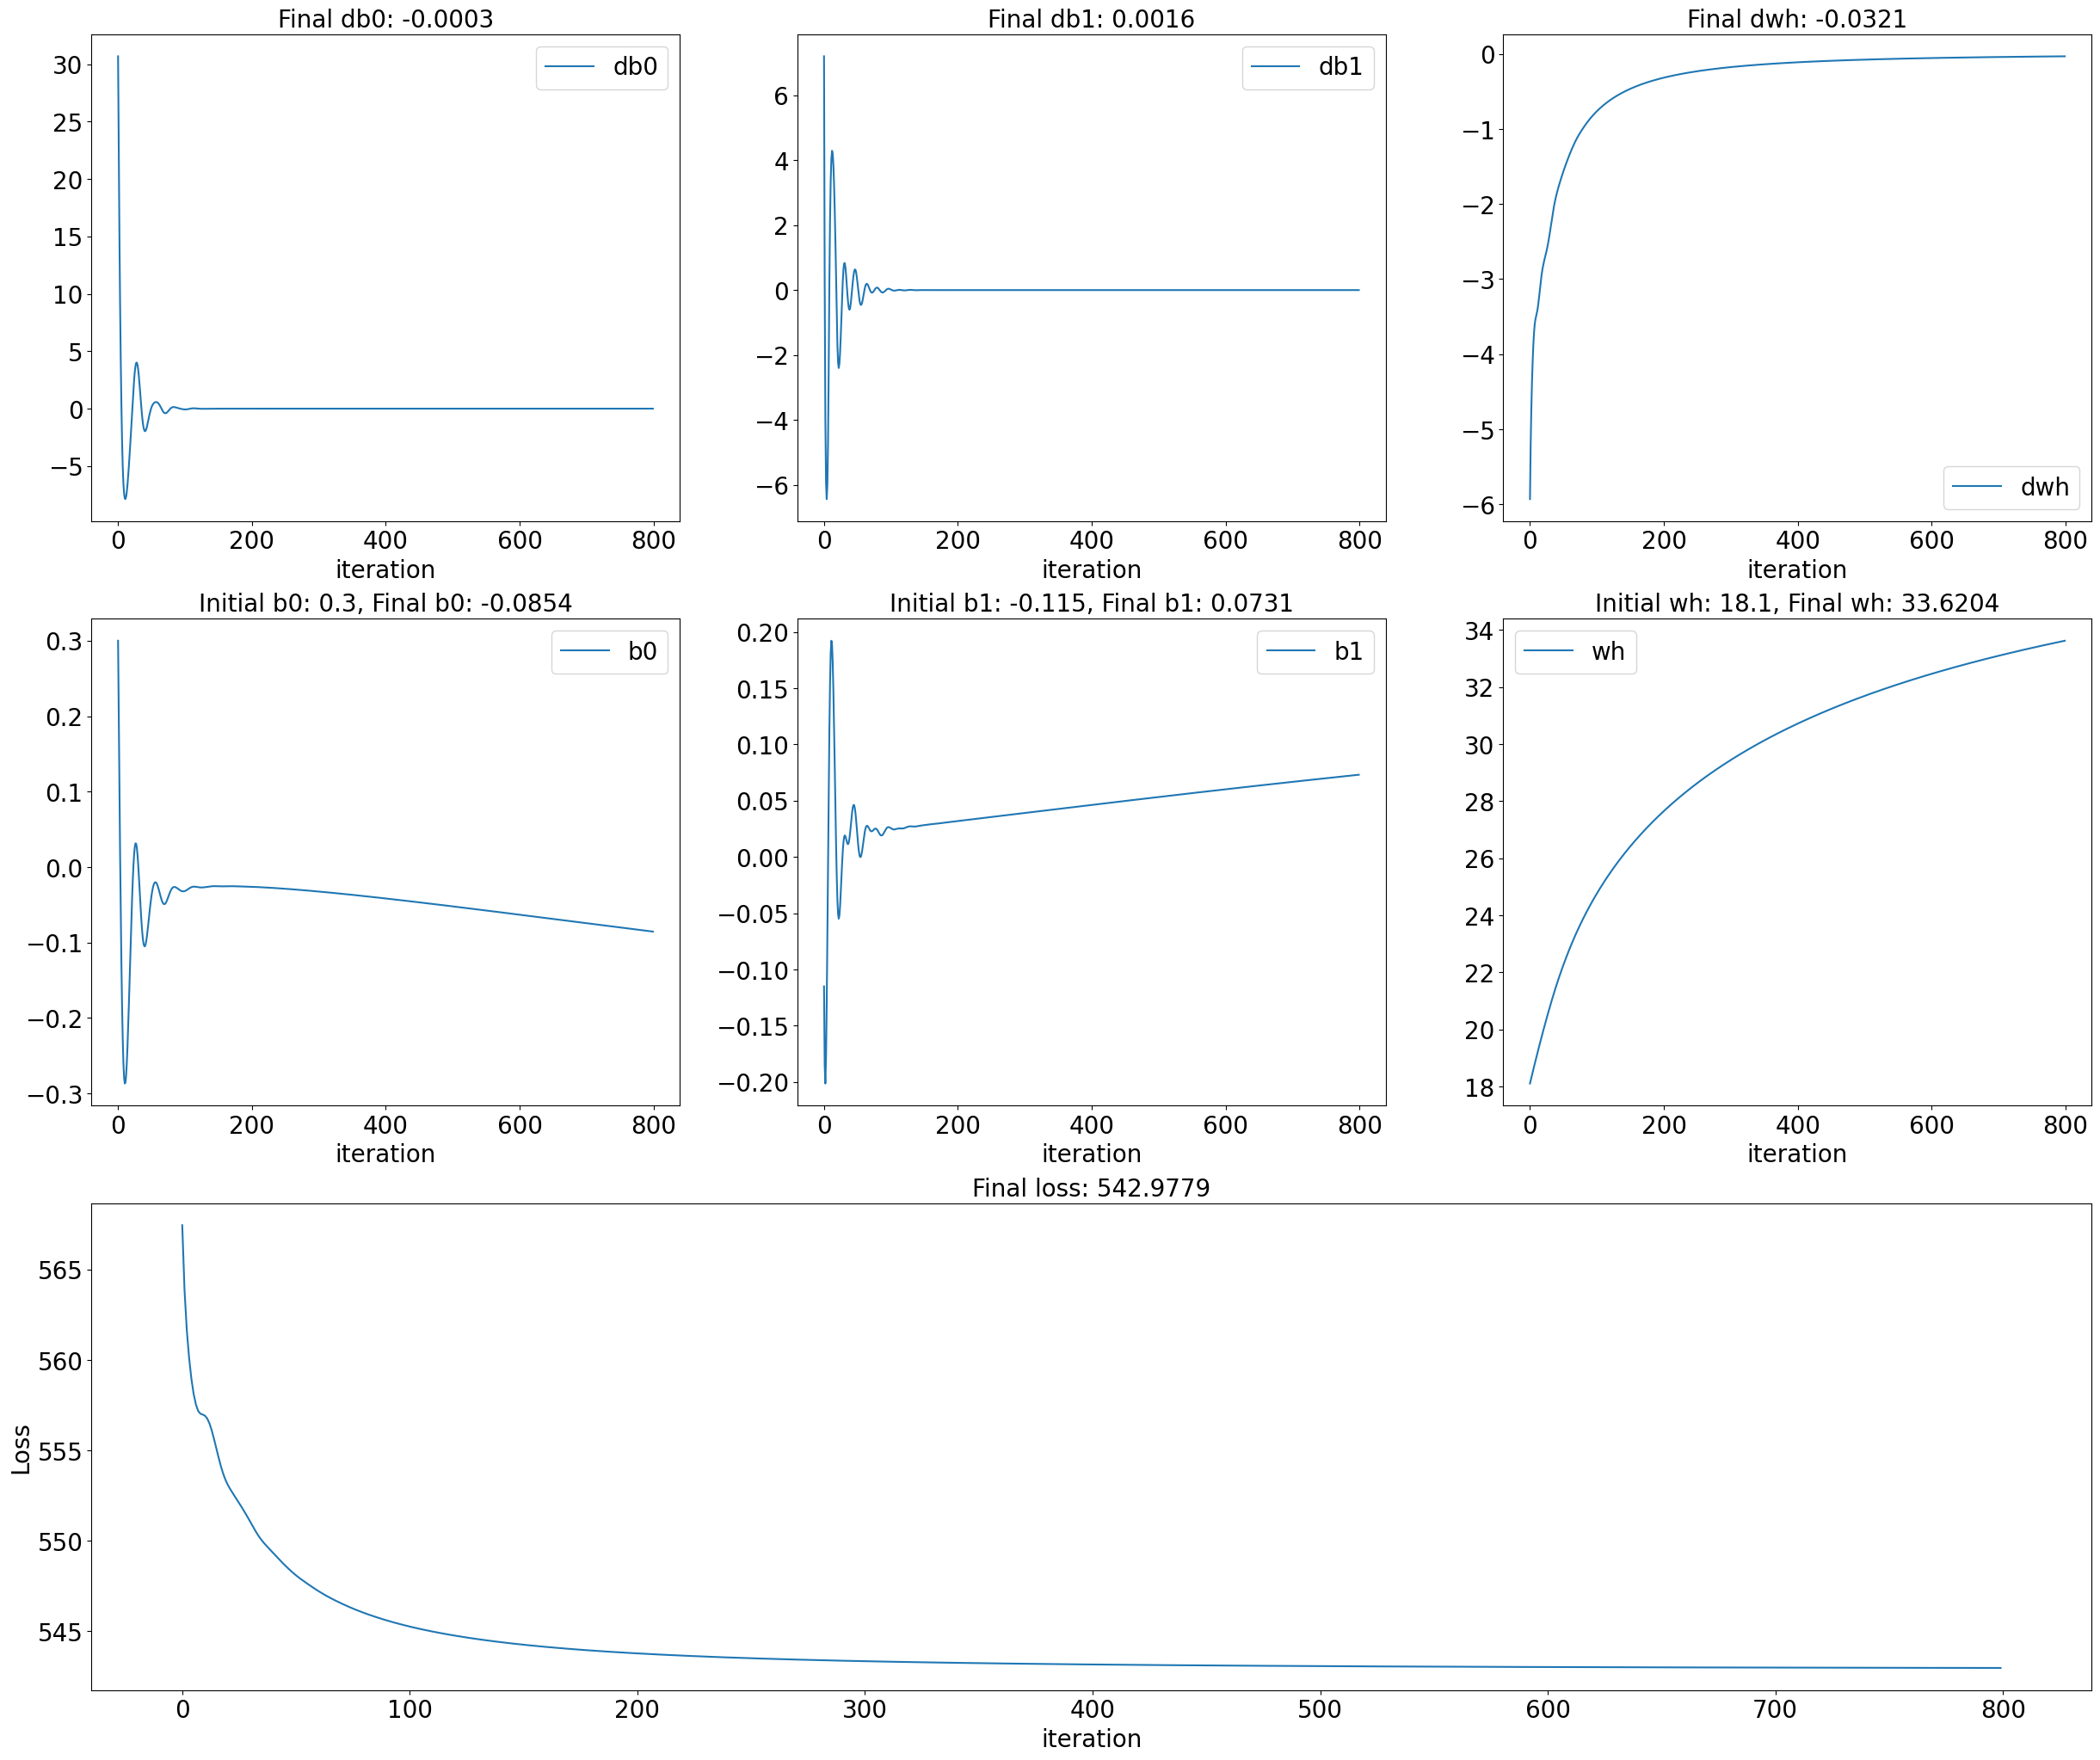

In [80]:
explore_result('636087')

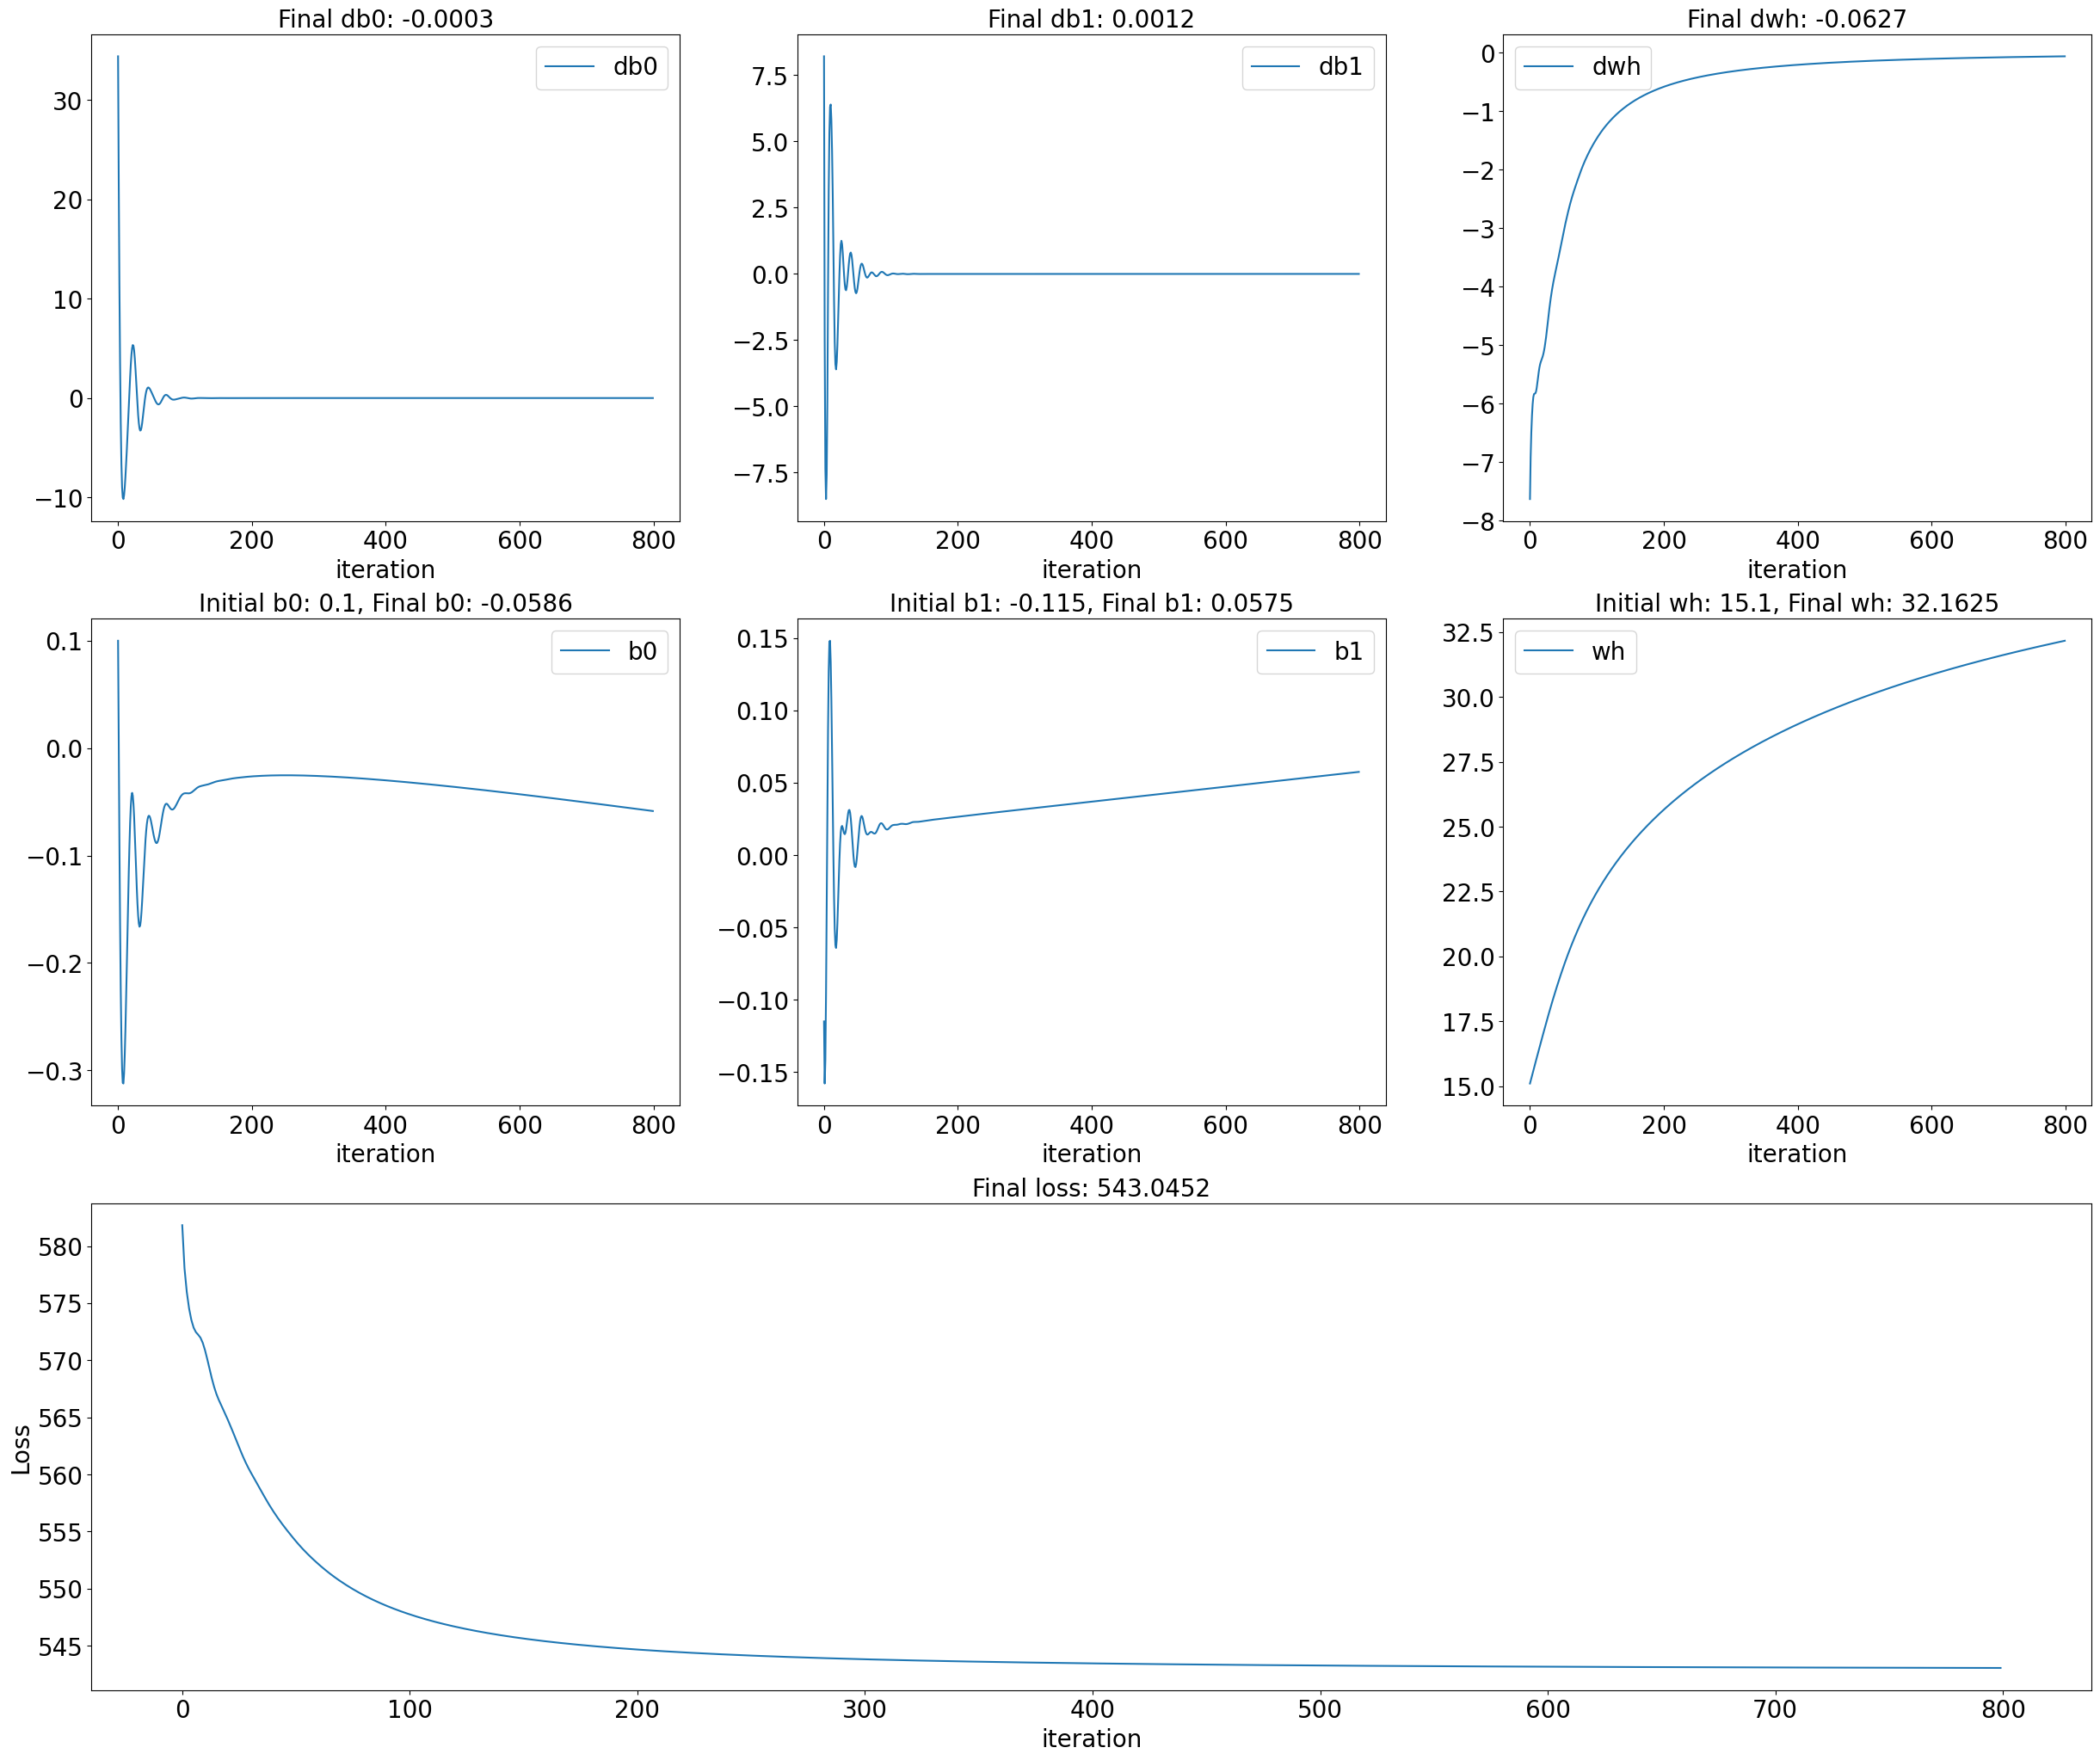

In [81]:
explore_result('503145')

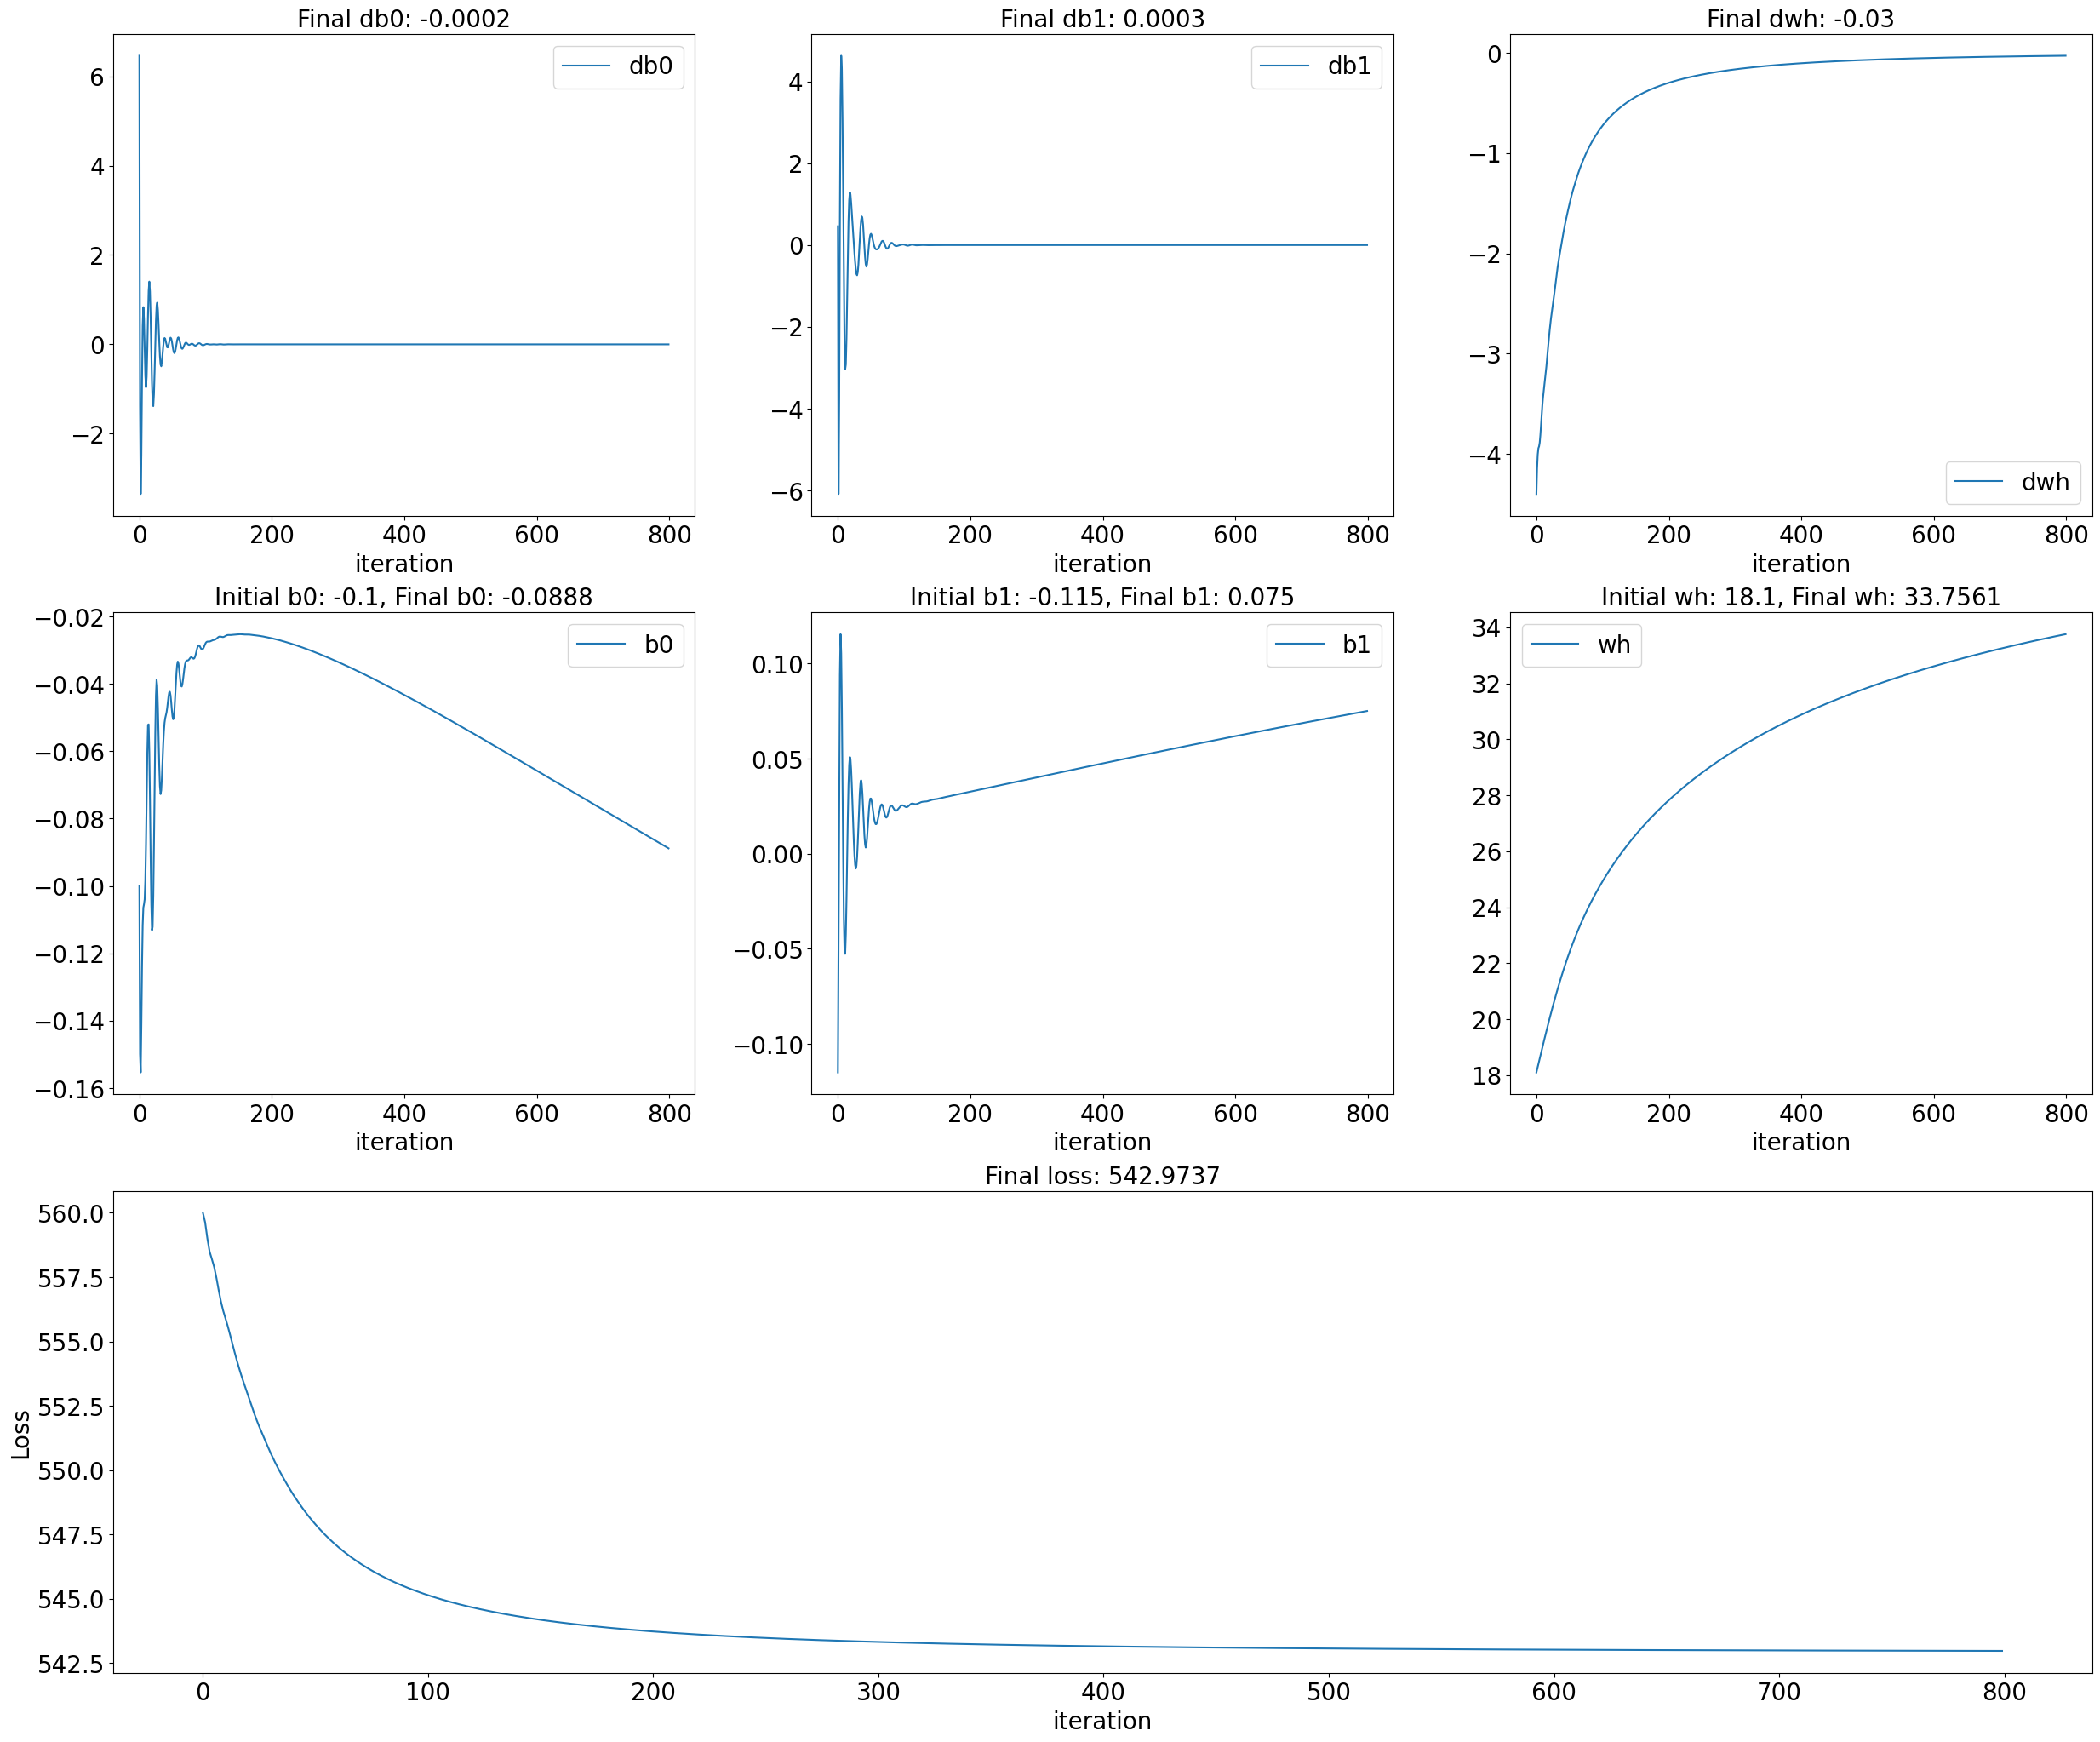

In [82]:
explore_result('575501')

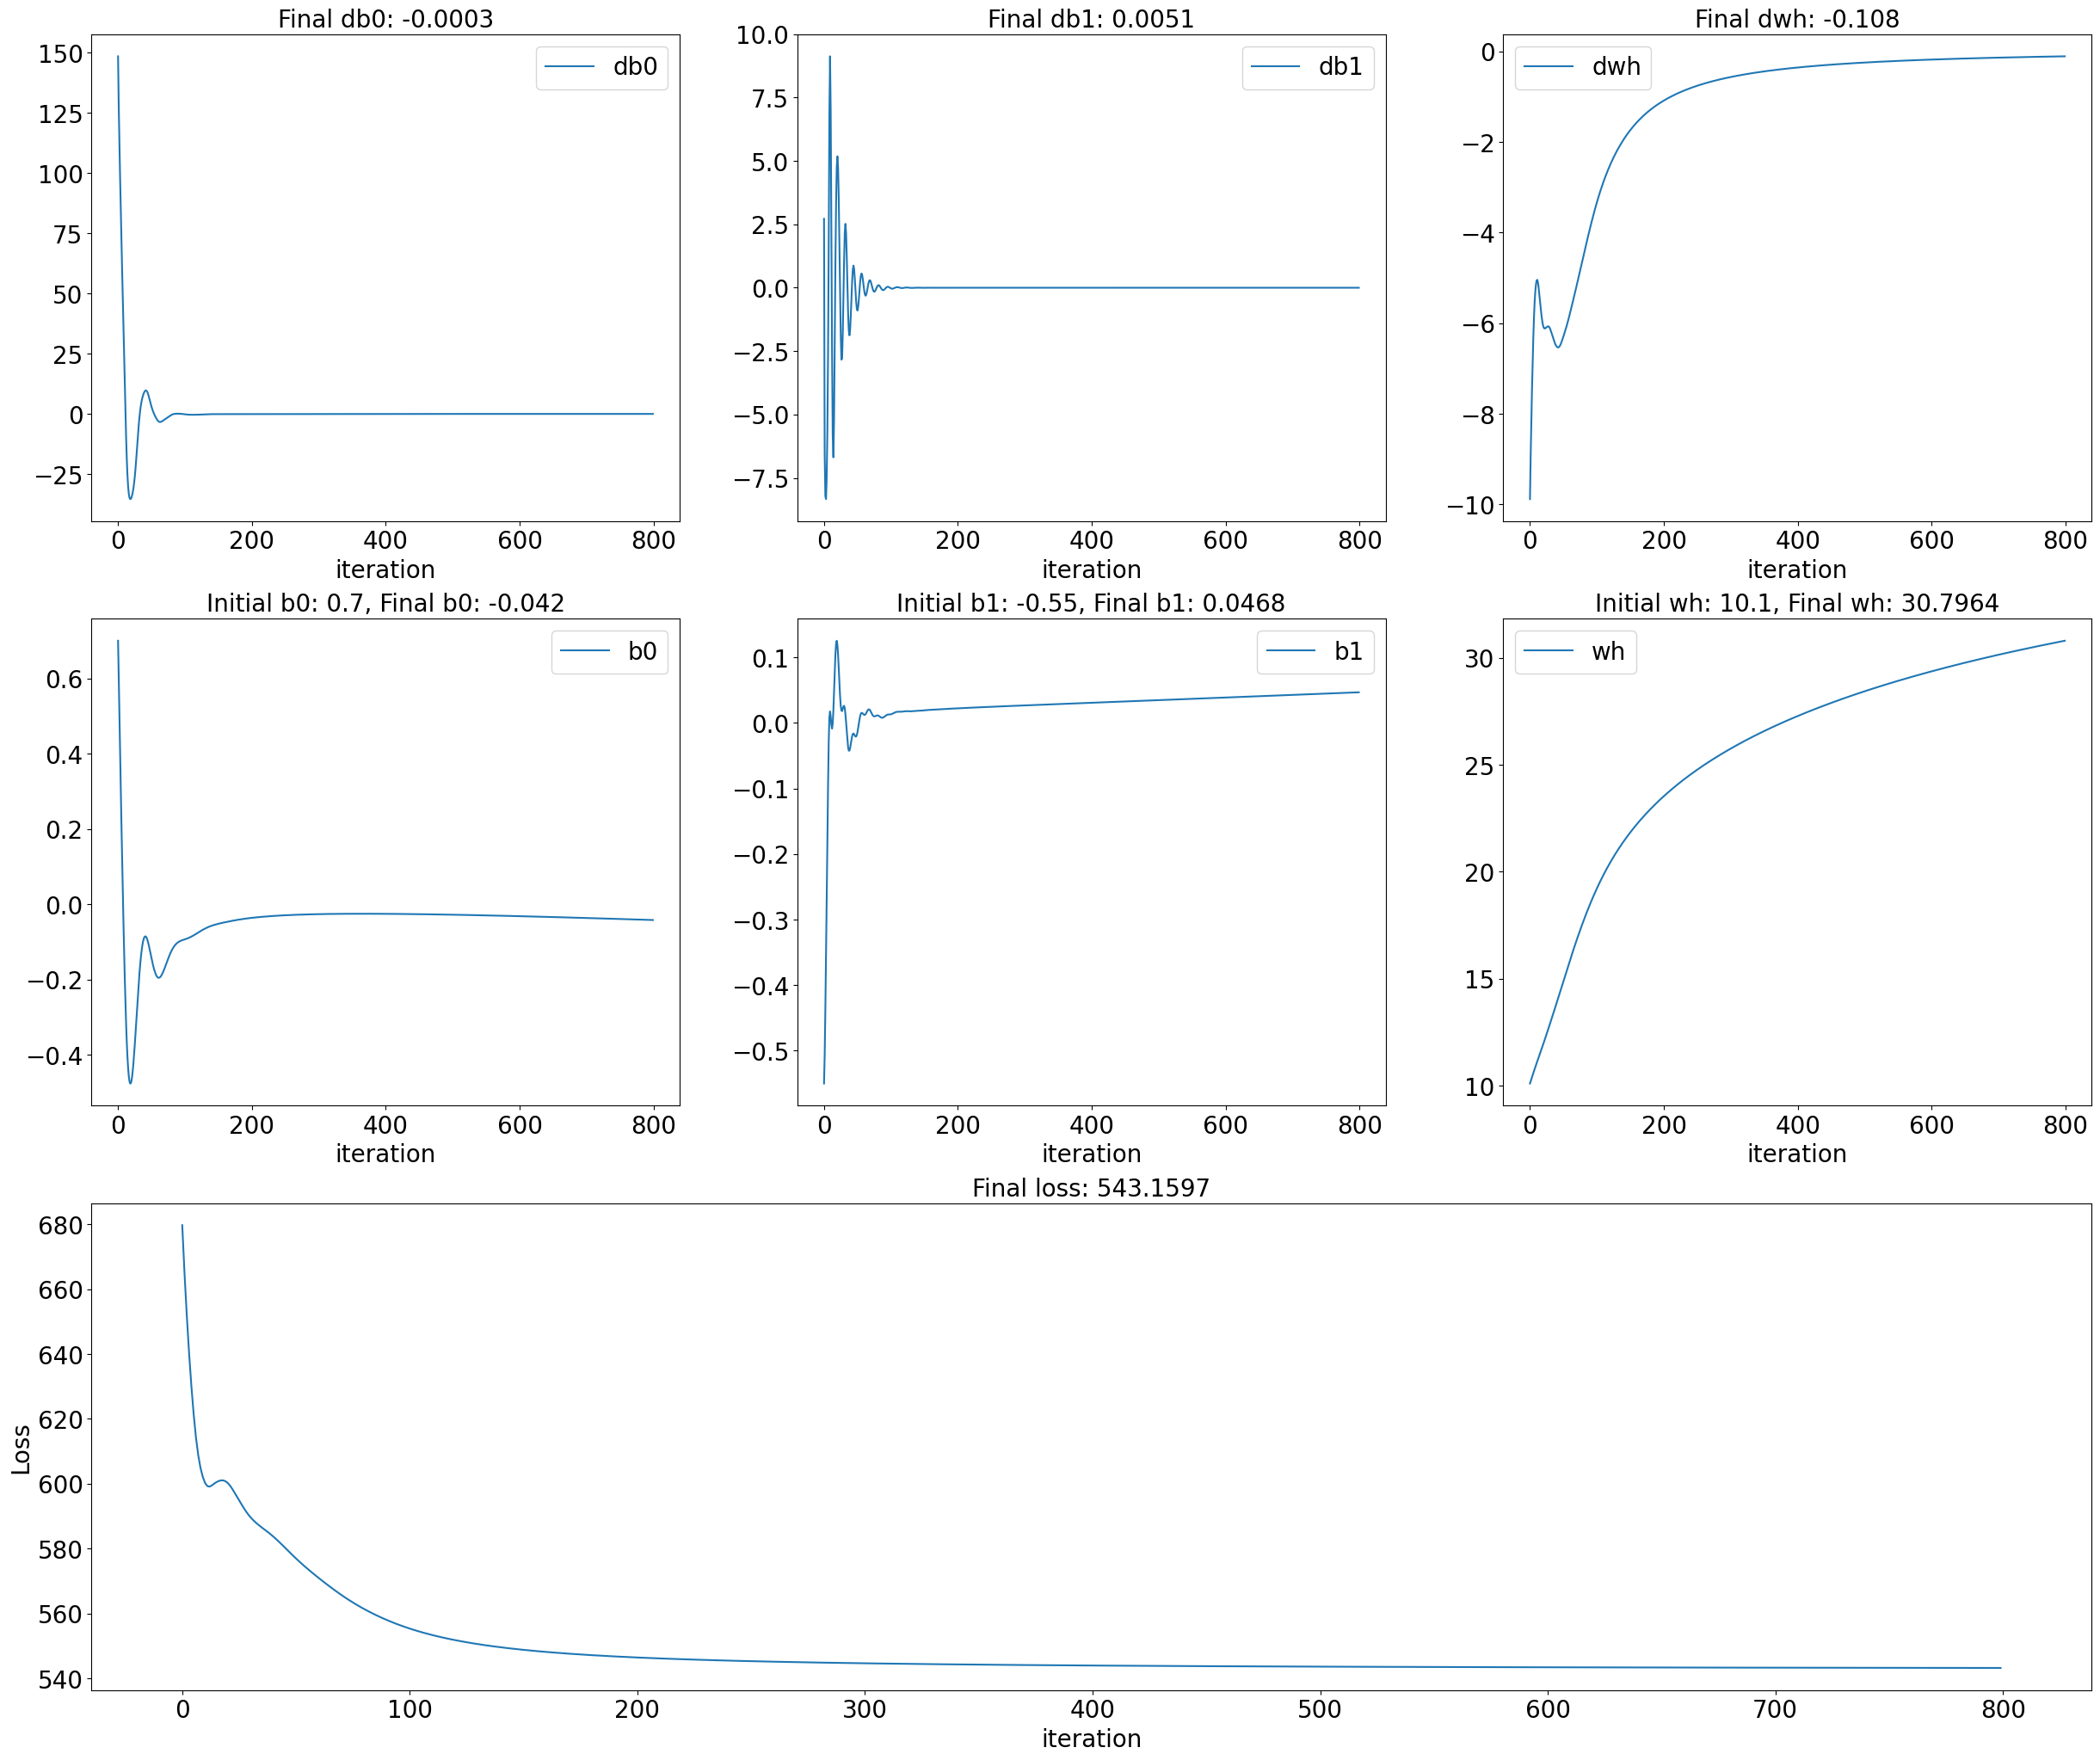

In [83]:
explore_result('797178')

In [46]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [272]:
np.random.seed(2023 + 0)
for _ in range(4):
    print(np.random.choice(np.array([1,2,3,4,5]), size = 5))

[2 2 5 4 5]
[5 1 2 1 3]
[4 3 5 2 1]
[2 1 3 4 1]


In [269]:
np.random.seed(2023 + 1)
for _ in range(4):
    print(np.random.choice(np.array([1,2,3,4,5]), size = 5))

[1 3 1 1 4]
[5 2 2 5 4]
[3 3 1 5 2]
[3 4 5 4 3]


In [9]:
import os
import glob
import shutil
results = [mfile for mfile in glob.glob('../Output/*.csv') if 'Bootstrap' in mfile]

In [7]:
for f in results:
    new_path = '../Output/Bootstrap/' + f.split('/')[2]
    shutil.move(f, new_path)

In [16]:
import datetime
datetime.datetime.fromtimestamp(os.path.getmtime(results[0])) < datetime.datetime(2023, 8, 1)

False

In [17]:
import datetime
results = [mfile for mfile in glob.glob('../Output/*.csv') if datetime.datetime.fromtimestamp(os.path.getmtime(mfile)) < datetime.datetime(2023, 8, 8)]


In [21]:
for f in results:
    new_path = '../Output/PreTRB/' + f.split('/')[2]
    shutil.move(f, new_path)

In [20]:
len(results)

187

In [163]:
def create_df(i, metric):
    df = pd.read_csv(csv_files[i], parse_dates = ['date'])
    df = df.loc[(df.date >= '2020-01-06')]['date']
    df = df.reset_index(drop = True)
    results = [mfile for mfile in glob.glob('../Output/{}/*.csv'.format(metric))]
    m = pd.read_csv(results[0]).iloc[i]
    m = pd.DataFrame(m).dropna()
    m = m.reset_index(drop = True)
    dfw = pd.concat([df, m], axis = 1)
    dfw.set_index('date', inplace = True)
    return dfw

In [165]:
csv_files = glob.glob(os.path.join('//global/scratch/users/norahluo/trajectory', '*.csv'))
dfw_ = create_df(0, 'weight')

for i in range(1, len(csv_files)):
    dfw = create_df(i, 'weight')
    dfw_ = pd.concat([dfw_, dfw], axis = 1)

<Axes: xlabel='date'>

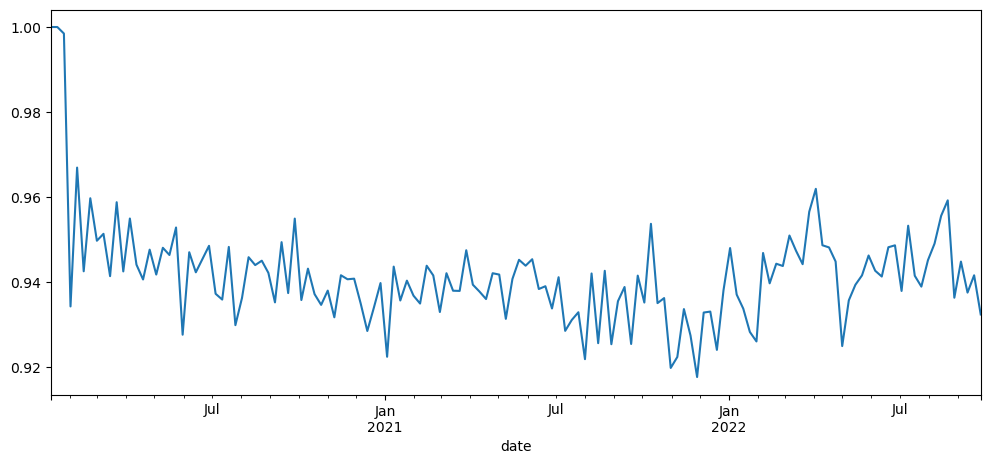

In [173]:
dfw_.mean(axis = 1)[6::7].plot(figsize = (12, 5))

In [174]:
dfw_ = create_df(0, 'prob')

for i in range(1, len(csv_files)):
    dfw = create_df(i, 'prob')
    dfw_ = pd.concat([dfw_, dfw], axis = 1)

<Axes: xlabel='date'>

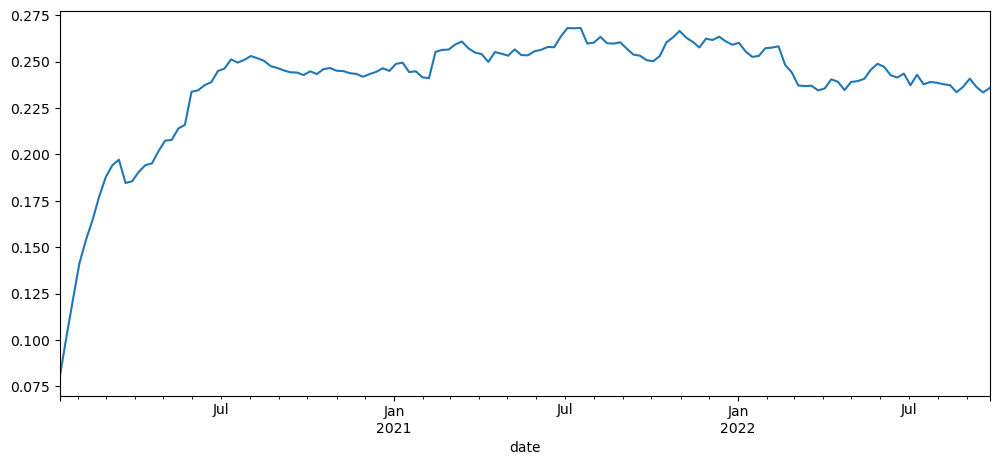

In [175]:
dfw_.mean(axis = 1)[6::7].plot(figsize = (12, 5))

<Axes: xlabel='date'>

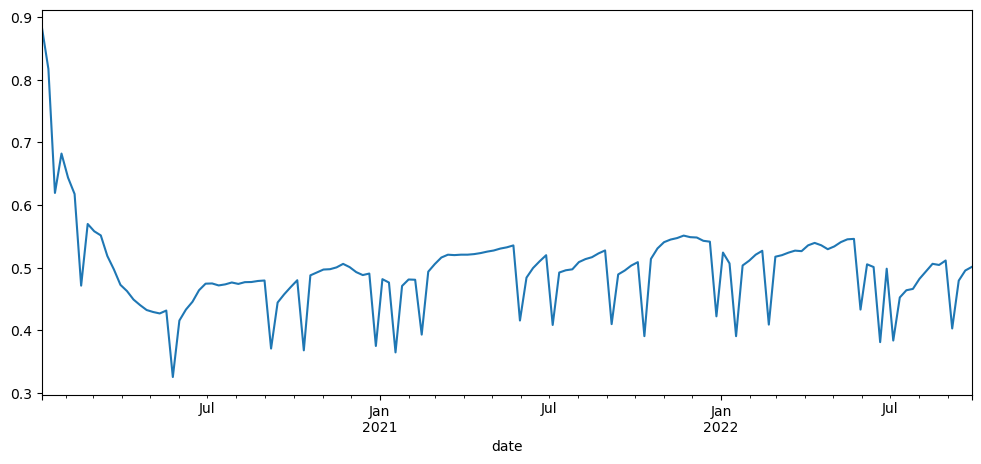

In [182]:
dfw_.mean(axis = 1)[::7].plot(figsize = (12, 5))